# Object Detection

In this tutorial, you will learn:
- the basic structure of Faster R-CNN.
- to perform inference with a MMDetection detector.
- to train a new detector with a new dataset.

Let's start!


## Install MMDetection

In [1]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
from mmcv import collect_env
collect_env()

{'sys.platform': 'linux',
 'Python': '3.9.7 (default, Sep 16 2021, 13:09:58) [GCC 7.5.0]',
 'CUDA available': True,
 'GPU 0,1': 'NVIDIA RTX A4000',
 'CUDA_HOME': '/usr',
 'NVCC': 'Cuda compilation tools, release 10.1, V10.1.243',
 'GCC': 'gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0',
 'PyTorch': '1.9.0+cu111',
 'PyTorch compiling details': 'PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.1.2 (Git Hash 98be7e8afa711dc9b66c8ff3504129cb82013cdb)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.1\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86,code=sm_86\n  - 

In [3]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.9.0+cu111 True
2.11.0
11.1
GCC 7.3


## Perform Inference with An MMDet detector



In [4]:
# We download the pre-trained checkpoints for inference and finetuning.
!mkdir checkpoints

!wget -c https://download.openmmlab.com/mmdetection/v2.0/yolof/yolof_r50_c5_8x8_1x_coco/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth \
      -O checkpoints/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth 


--2022-03-28 14:50:05--  https://download.openmmlab.com/mmdetection/v2.0/yolof/yolof_r50_c5_8x8_1x_coco/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.74.197.77
Connecting to download.openmmlab.com (download.openmmlab.com)|47.74.197.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176992053 (169M) [application/octet-stream]
Saving to: ‘checkpoints/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth’

checkpoints/yolof_r 100%[===================>] 168.79M  7.86MB/s    in 22s     

2022-03-28 14:50:27 (7.56 MB/s) - ‘checkpoints/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth’ saved [176992053/176992053]



In [7]:
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

# Choose to use a config and initialize the detector
config = 'configs/yolo/yolov3_d53_320_273e_coco.py'
# Setup a checkpoint file to load
# checkpoint = 'checkpoints/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth'

# Set the device to be used for evaluation
device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# # Load checkpoint
# checkpoint = load_checkpoint(model, checkpoint, map_location=device)

# Set the classes of models for inference
# model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()

YOLOV3(
  (backbone): Darknet(
    (conv1): ConvModule(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activate): LeakyReLU(negative_slope=0.1, inplace=True)
    )
    (conv_res_block1): Sequential(
      (conv): ConvModule(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activate): LeakyReLU(negative_slope=0.1, inplace=True)
      )
      (res0): ResBlock(
        (conv1): ConvModule(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (activate): LeakyReLU(negative_slope=0.1, inplace=True)
        )
        (conv2): ConvModule(
          (conv): Conv2d(32, 64, kerne

### Inference the detector

Since the model is successfully created and loaded, let's see how good it is. We use the high-level API `inference_detector` implemented in the MMDetection. This API is created to ease the inference process. The details of the codes can be found [here](https://github.com/open-mmlab/mmdetection/blob/master/mmdet/apis/inference.py#L15).

In [8]:
# Use the detector to do inference
img = 'demo/demo.jpg'
result = inference_detector(model, img)

/home/khurshid/git_space/Swin-Transformer-Object-Detection/mmdet/datasets/utils.py:64: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


In [9]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3)

AttributeError: 'YOLOV3' object has no attribute 'CLASSES'

## Train A Detector on A Customized Dataset

To train a new detector, there are usually three things to do:
1. Support a new dataset
2. Modify the config
3. Train a new detector



### Support a new dataset

There are three ways to support a new dataset in MMDetection: 
  1. Reorganize the dataset into a COCO format.
  2. Reorganize the dataset into a middle format.
  3. Implement a new dataset.

We recommend the first two methods, as they are usually easier than the third one.

In this tutorial, we give an example that converts the data into the formats of existing datasets, e.g. COCO, VOC, etc. Other methods and more advanced usages can be found in the [doc](https://mmdetection.readthedocs.io/en/latest/tutorials/customize_dataset.html#).

First, let's download a tiny dataset obtained from [KITTI](http://www.cvlibs.net/datasets/kitti/eval_object.php?obj_benchmark=3d). We select the first 75 images and their annotations from the 3D object detection dataset (it is the same dataset as the 2D object detection dataset but with 3D annotations). We convert the original images from PNG to JPEG format with 80% quality to reduce the size of the dataset.

In [18]:
# download, decompress the data
!wget https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
!unzip kitti_tiny.zip > /dev/null

--2022-03-18 13:28:47--  https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
Resolving download.openmmlab.com (download.openmmlab.com)... 47.74.197.77
Connecting to download.openmmlab.com (download.openmmlab.com)|47.74.197.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6918271 (6.6M) [application/zip]
Saving to: ‘kitti_tiny.zip.1’

kitti_tiny.zip.1    100%[===================>]   6.60M  10.7MB/s    in 0.6s    

2022-03-18 13:28:52 (10.7 MB/s) - ‘kitti_tiny.zip.1’ saved [6918271/6918271]

replace kitti_tiny/val.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
# Check the directory structure of the tiny data

# Install tree first
# !apt-get -q install tree
!tree kitti_tiny

kitti_tiny
├── training
│   ├── image_2
│   │   ├── 000000.jpeg
│   │   ├── 000001.jpeg
│   │   ├── 000002.jpeg
│   │   ├── 000003.jpeg
│   │   ├── 000004.jpeg
│   │   ├── 000005.jpeg
│   │   ├── 000006.jpeg
│   │   ├── 000007.jpeg
│   │   ├── 000008.jpeg
│   │   ├── 000009.jpeg
│   │   ├── 000010.jpeg
│   │   ├── 000011.jpeg
│   │   ├── 000012.jpeg
│   │   ├── 000013.jpeg
│   │   ├── 000014.jpeg
│   │   ├── 000015.jpeg
│   │   ├── 000016.jpeg
│   │   ├── 000017.jpeg
│   │   ├── 000018.jpeg
│   │   ├── 000019.jpeg
│   │   ├── 000020.jpeg
│   │   ├── 000021.jpeg
│   │   ├── 000022.jpeg
│   │   ├── 000023.jpeg
│   │   ├── 000024.jpeg
│   │   ├── 000025.jpeg
│   │   ├── 000026.jpeg
│   │   ├── 000027.jpeg
│   │   ├── 000028.jpeg
│   │   ├── 000029.jpeg
│   │   ├── 000030.jpeg
│   │   ├── 000031.jpeg
│   │   ├── 000032.jpeg
│   │   ├── 000033.jpeg
│   │   ├── 000034.jpeg
│   │   ├── 000035.jpeg
│   │   ├── 000036.jpeg
│   │   ├── 000037.jpeg
│   │   ├── 000038.jpeg
│   │   ├── 000039.jpeg


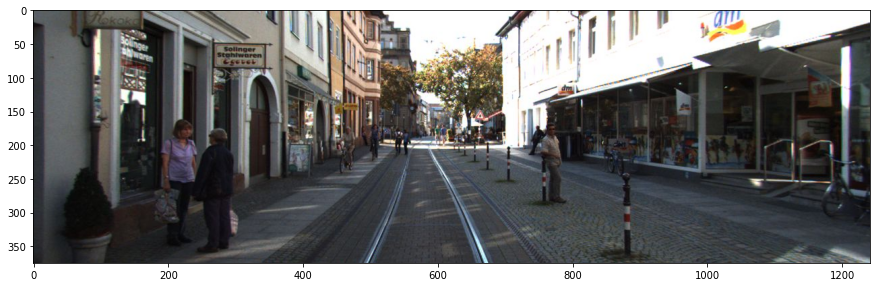

In [9]:
# Let's take a look at the dataset image
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('kitti_tiny/training/image_2/000073.jpeg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

After downloading the data, we need to implement a function to convert the KITTI annotation format into the middle format. In this tutorial, we choose to convert them in **`load_annotations`** function in a newly implemented **`KittiTinyDataset`**.

Let's take a loot at the annotation txt file.



In [10]:
# Check the label of a single image
!cat kitti_tiny/training/label_2/000000.txt

Pedestrian 0.00 0 -0.20 712.40 143.00 810.73 307.92 1.89 0.48 1.20 1.84 1.47 8.41 0.01


According to the KITTI's documentation, the first column indicates the class of the object, and the 5th to 8th columns indicate the bboxes. We need to read annotations of each image and convert them into middle format that MMDetection can accept, as follows:

```python
[
    {
        'filename': 'a.jpg',
        'width': 1280,
        'height': 720,
        'ann': {
            'bboxes': <np.ndarray> (n, 4) in (x1, y1, x2, y2) order,
            'labels': <np.ndarray> (n, ),
            'bboxes_ignore': <np.ndarray> (k, 4), (optional field)
            'labels_ignore': <np.ndarray> (k, 4) (optional field)
        }
    },
    ...
]
```

In [11]:
import copy
import os.path as osp

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

@DATASETS.register_module()
class KittiTinyDataset(CustomDataset):

    CLASSES = ('Car', 'Pedestrian', 'Cyclist')

    def load_annotations(self, ann_file):
        cat2label = {k: i for i, k in enumerate(self.CLASSES)}
        # load image list from file
        image_list = mmcv.list_from_file(self.ann_file)
    
        data_infos = []
        # convert annotations to middle format
        for image_id in image_list:
            filename = f'{self.img_prefix}/{image_id}.jpeg'
            image = mmcv.imread(filename)
            height, width = image.shape[:2]
    
            data_info = dict(filename=f'{image_id}.jpeg', width=width, height=height)
    
            # load annotations
            label_prefix = self.img_prefix.replace('image_2', 'label_2')
            lines = mmcv.list_from_file(osp.join(label_prefix, f'{image_id}.txt'))
    
            content = [line.strip().split(' ') for line in lines]
            bbox_names = [x[0] for x in content]
            bboxes = [[float(info) for info in x[4:8]] for x in content]
    
            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []
    
            # filter 'DontCare'
            for bbox_name, bbox in zip(bbox_names, bboxes):
                if bbox_name in cat2label:
                    gt_labels.append(cat2label[bbox_name])
                    gt_bboxes.append(bbox)
                else:
                    gt_labels_ignore.append(-1)
                    gt_bboxes_ignore.append(bbox)

            data_anno = dict(
                bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                labels=np.array(gt_labels, dtype=np.long),
                bboxes_ignore=np.array(gt_bboxes_ignore,
                                       dtype=np.float32).reshape(-1, 4),
                labels_ignore=np.array(gt_labels_ignore, dtype=np.long))

            data_info.update(ann=data_anno)
            data_infos.append(data_info)

        return data_infos

### Modify the config

In the next step, we need to modify the config for the training.
To accelerate the process, we finetune a detector using a pre-trained detector.

In [8]:
from mmcv import Config
import mmcv
cfg = Config.fromfile('./configs/yolo/yolov3_d53_320_273e_coco.py')

Given a config that trains a Faster R-CNN on COCO dataset, we need to modify some values to use it for training Faster R-CNN on KITTI dataset. We modify the config of datasets, learning rate schedules, and runtime settings.

In [9]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
# cfg.dataset_type = 'KittiTinyDataset'
# cfg.data_root = 'kitti_tiny/'

# cfg.data.test.type = 'KittiTinyDataset'
# cfg.data.test.data_root = 'kitti_tiny/'
# cfg.data.test.ann_file = 'train.txt'
# cfg.data.test.img_prefix = 'training/image_2'

# cfg.data.train.type = 'KittiTinyDataset'
# cfg.data.train.data_root = 'kitti_tiny/'
# cfg.data.train.ann_file = 'train.txt'
# cfg.data.train.img_prefix = 'training/image_2'

# cfg.data.val.type = 'KittiTinyDataset'
# cfg.data.val.data_root = 'kitti_tiny/'
# cfg.data.val.ann_file = 'val.txt'
# cfg.data.val.img_prefix = 'training/image_2'

# modify num classes of the model in box head
# cfg.model.bbox_head.num_classes = 3
# # If we need to finetune a model based on a pre-trained detector, we need to
# # use load_from to set the path of checkpoints.
# cfg.load_from = 'checkpoints/yolof_r50_c5_8x8_1x_coco_20210425_024427-8e864411.pth'

# # Set up working dir to save files and logs.
cfg.work_dir = './tutorial_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]


# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')


Config:
checkpoint_config = dict(interval=12)
log_config = dict(
    interval=10,
    hooks=[dict(type='TextLoggerHook'),
           dict(type='TensorboardLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
workflow = [('train', 1)]
model = dict(
    type='YOLOV3',
    pretrained='open-mmlab://darknet53',
    backbone=dict(type='Darknet', depth=53, out_indices=(3, 4, 5)),
    neck=dict(
        type='YOLOV3Neck',
        num_scales=3,
        in_channels=[1024, 512, 256],
        out_channels=[512, 256, 128]),
    bbox_head=dict(
        type='YOLOV3Head',
        num_classes=80,
        in_channels=[512, 256, 128],
        out_channels=[1024, 512, 256],
        anchor_generator=dict(
            type='YOLOAnchorGenerator',
            base_sizes=[[(116, 90), (156, 198), (373, 326)],
                        [(30, 61), (62, 45), (59, 119)],
                        [(10, 13), (16, 30), (3

### Train a new detector

Finally, lets initialize the dataset and detector, then train a new detector! We use the high-level API `train_detector` implemented by MMDetection. This is also used in our training scripts. For details of the implementation, please see [here](https://github.com/open-mmlab/mmdetection/blob/master/mmdet/apis/train.py).

In [10]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
import os.path as osp


# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector(cfg.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

loading annotations into memory...
Done (t=10.83s)
creating index...
index created!


2022-03-29 14:46:49,676 - mmdet - INFO - load model from: open-mmlab://darknet53


loading annotations into memory...


2022-03-29 14:46:52,833 - mmdet - INFO - Start running, host: khurshid@newuser-desktop, work_dir: /home/khurshid/git_space/Swin-Transformer-Object-Detection/tutorial_exps
2022-03-29 14:46:52,834 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) CheckpointHook                     
(NORMAL      ) EvalHook                           
(VERY_LOW    ) TextLoggerHook                     
(VERY_LOW    ) TensorboardLoggerHook              
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) StepLrUpdaterHook                  
(NORMAL      ) EvalHook                           
(NORMAL      ) NumClassCheckHook                  
(LOW         ) IterTimerHook                      
(VERY_LOW    ) TextLoggerHook                     
(VERY_LOW    ) TensorboardLoggerHook              
 -------------------- 
before_train_iter:
(VERY_HIGH   ) StepLrUpdaterHook                  
(LOW         ) IterTimerHook    

Done (t=0.26s)
creating index...
index created!


2022-03-29 14:46:57,383 - mmdet - INFO - Epoch [1][10/14659]	lr: 2.500e-03, eta: 20 days, 20:23:51, time: 0.450, data_time: 0.289, memory: 2532, loss_cls: 2842.0266, loss_conf: 12545.6368, loss_xy: 143.6208, loss_wh: 47.5137, loss: 15578.7982, grad_norm: 34610.1983
2022-03-29 14:46:59,037 - mmdet - INFO - Epoch [1][20/14659]	lr: 2.500e-03, eta: 14 days, 6:07:16, time: 0.165, data_time: 0.007, memory: 2532, loss_cls: 3203.3814, loss_conf: 488.5008, loss_xy: 172.6039, loss_wh: 54.8094, loss: 3919.2956, grad_norm: 4892.0981
2022-03-29 14:47:00,640 - mmdet - INFO - Epoch [1][30/14659]	lr: 2.500e-03, eta: 11 days, 23:28:59, time: 0.160, data_time: 0.007, memory: 2532, loss_cls: 2058.5674, loss_conf: 438.8446, loss_xy: 138.9561, loss_wh: 41.5238, loss: 2677.8917, grad_norm: 5588.1853
2022-03-29 14:47:02,276 - mmdet - INFO - Epoch [1][40/14659]	lr: 2.500e-03, eta: 10 days, 21:06:32, time: 0.164, data_time: 0.007, memory: 2532, loss_cls: 1989.9675, loss_conf: 540.4841, loss_xy: 157.3168, loss_

KeyboardInterrupt: 

### Understand the log
From the log, we can have a basic understanding on the training process and know how well the detector is trained.

First, since the dataset we are using is small, we loaded a pre-trained Faster R-CNN model and fine-tune it for detection. 
The original Faster R-CNN is trained on COCO dataset that contains 80 classes but KITTI Tiny dataset only have 3 classes. Therefore, the last FC layers of the pre-trained Faster R-CNN for classification and regression have different weight shape and are not used.

Second, after training, the detector is evaluated by the default VOC-style evaluation. The results show that the detector achieves 58.1 mAP on the val dataset, not bad!


## Test the Trained Detector

After finetuning the detector, let's visualize the prediction results!

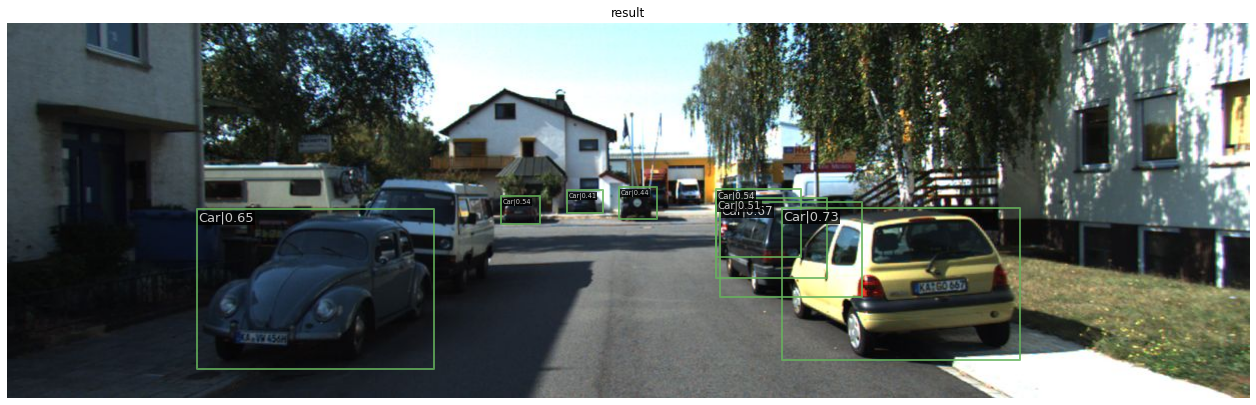

In [16]:
img = mmcv.imread('kitti_tiny/training/image_2/000032.jpeg')

model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result)


## What to Do Next?

So far, we have learnt how to test and train a two-stage detector using MMDetection. To further explore MMDetection, you could do several other things as shown below:

- Try single-stage detectors, e.g., [RetinaNet](https://github.com/open-mmlab/mmdetection/tree/master/configs/retinanet) and [SSD](https://github.com/open-mmlab/mmdetection/tree/master/configs/ssd) in [MMDetection model zoo](https://github.com/open-mmlab/mmdetection/blob/master/docs/en/model_zoo.md). Single-stage detectors are more commonly used than two-stage detectors in industry.
- Try anchor-free detectors, e.g., [FCOS](https://github.com/open-mmlab/mmdetection/tree/master/configs/fcos) and [RepPoints](https://github.com/open-mmlab/mmdetection/tree/master/configs/reppoints) in [MMDetection model zoo](https://github.com/open-mmlab/mmdetection/blob/master/docs/en/model_zoo.md). Anchor-free detector is a new trend in the object detection community.
- Try 3D object detection using [MMDetection3D](https://github.com/open-mmlab/mmdetection3d), also one of the OpenMMLab projects. In MMDetection3D, not only can you try all the methods supported in MMDetection but also some 3D object detectors.
